# Logistic Regression

In this tutorial we will introduce how to build a logistic regression model using BigDL. We use *MNIST* datas for experiments in this tutorial. For more information about MNIST, please refer to this [site](http://yann.lecun.com/exdb/mnist/). The first thing we need to do it to import necessary packages and inilialize the engine.

In [1]:
%pylab inline
import pandas
import datetime as dt

from bigdl.nn.layer import *
from bigdl.nn.criterion import *
from bigdl.optim.optimizer import *
from bigdl.util.common import *
from bigdl.dataset.transformer import *
from bigdl.dataset import mnist
from utils import get_mnist

init_engine()

Populating the interactive namespace from numpy and matplotlib


Then we get and store MNIST for training and testing. You should edit the "mnist_path" according to your system settings. If the "mnist_path" directory does not have the MNIST datasets, then the mnist.read_data_sets method will download the datasets automatically.

In [2]:
mnist_path = "datasets/mnist"
(train_data, test_data) = get_mnist(sc, mnist_path)

print train_data.count()
print test_data.count()

('Extracting', 'datasets/mnist/train-images-idx3-ubyte.gz')
('Extracting', 'datasets/mnist/train-labels-idx1-ubyte.gz')
('Extracting', 'datasets/mnist/t10k-images-idx3-ubyte.gz')
('Extracting', 'datasets/mnist/t10k-labels-idx1-ubyte.gz')
60000
10000


In [3]:
# Parameters
learning_rate = 0.2
training_epochs = 15
batch_size = 2048

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [4]:
# Define the logistic_regression model
def logistic_regression(n_input, n_classes):
    # Initialize a sequential container
    model = Sequential()
 
    model.add(Reshape([28*28]))
    model.add(Linear(n_input, n_classes))
    model.add(LogSoftMax())
    
    return model

model = logistic_regression(n_input, n_classes)

creating: createSequential
creating: createReshape
creating: createLinear
creating: createLogSoftMax


In [5]:
# Create an Optimizer

optimizer = Optimizer(
    model=model,
    training_rdd=train_data,
    criterion=ClassNLLCriterion(),
    optim_method=SGD(learningrate=learning_rate),
    end_trigger=MaxEpoch(training_epochs),
    batch_size=batch_size)

creating: createClassNLLCriterion
creating: createDefault
creating: createSGD
creating: createMaxEpoch
creating: createOptimizer


In [6]:
%%time
# Start to train
trained_model = optimizer.optimize()
print "Optimization Done."

Optimization Done.
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 14.5 s


In [7]:
def map_predict_label(l):
    return np.array(l).argmax()
def map_groundtruth_label(l):
    return l[0] - 1

Ground Truth labels:
7.0, 2.0, 1.0, 0.0, 4.0, 1.0, 4.0, 9.0
Predicted labels:
7, 2, 1, 0, 4, 1, 4, 9


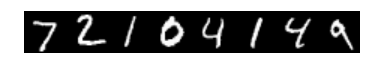

In [8]:
# Prediction
predictions = trained_model.predict(test_data)
imshow(np.column_stack([np.array(s.features).reshape(28,28) for s in test_data.take(8)]),cmap='gray'); axis('off')
print 'Ground Truth labels:'
print ', '.join(str(map_groundtruth_label(s.label)) for s in test_data.take(8))
print 'Predicted labels:'
print ', '.join(str(map_predict_label(s)) for s in predictions.take(8))